[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khouakhi/ewin_mex/blob/master/%20Data_%20prep_%20level.ipynb)



> If you open this notebook using google Colab, run the following three cells allowing:
1) Google Drive mount
2) Clone the repository to your drive and get the repo associated data.










#### 1- Google drive mount: 



In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd './drive/My Drive'
%pwd

/content/drive/My Drive


'/content/drive/My Drive'

#### 2- Clone the repository to your drive 

In [0]:
!git clone https://github.com/khouakhi/ewin_mex.git

In this notebook we will explore the EWIN sensors data, tidying it and visualizing it. 
The original data is in zipped subfolders by months for each sensor node, so we are going to unzip the subfolders, explore the data, clean it and save each time series by sensor node.


#### Import the necessary modules and packages

In [0]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile   
from glob import glob
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator
!pip install timestring
import timestring

  Created wheel for timestring: filename=timestring-1.6.4-cp36-none-any.whl size=13859 sha256=f0bdf35da2997151ce764622c31e29adf47e006f25a35fbcc49b377edeb566fc
  Stored in directory: /root/.cache/pip/wheels/91/da/e2/0026da716be28cd3cb39a12f868b0434f96f5b4cf3edaae6ef
Successfully built timestring


/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


#### Data source path 

In [0]:
data_source = './ewin_mex/data'
file_names = os.listdir(data_source)

#### Create an empty folder to unzip files
Here we are going to create an empty folder to which we unzip the subfolders to.

In [0]:
# Create an empty folder (if it doesnt exist) for the unzipped files
unzipped_data = os.path.join(data_source,"unzipped_data")
try:
    os.mkdir(unzipped_data)
except OSError:
    print ("folder exists already %s:" % unzipped_data)
else:
    print ("Successfully created the directory %s " % unzipped_data)

#### Unzip all folders recursively 
The following function will iterate through each folder and subfolder to unzip the folders.

In [0]:
# function that goes through folders and unzip fils 
def unzip_files(data_source,output_file):
  for path, dir_list, file_list in os.walk(data_source):
      for file_name in file_list:
          if file_name.endswith(".zip"):
              abs_file_path = os.path.join(path, file_name)
              print(abs_file_path)
              zip_obj = ZipFile(abs_file_path, 'r')
              zip_obj.extractall(output_file)
              zip_obj.close()
  print("Successfully unzipped!")   

In [0]:
# apply the function 
unzip_files(data_source=data_source, output_file=unzipped_data)

./ewin_mex/data/Rivercore_aug.zip
./ewin_mex/data/Atmos_aug.zip
./ewin_mex/data/Rivercore_sep.zip
./ewin_mex/data/Atmos_jun.zip
./ewin_mex/data/Atmos_sep.zip
./ewin_mex/data/Atmos_jul.zip
./ewin_mex/data/Rivercore_jul.zip
./ewin_mex/data/Rivercore_jun.zip
Successfully unzipped!


### RiverCore data
Given the difference in the data format for the RiverCore and Atmos data, we are going to explore them separately starting by the RiverCore files. 

We can loop through each subfolder and use the keyword "Node" to find all the paths of the RiverCore data.


In [0]:
# find level files 
all_lvl_files = []
substring = "Node"#_10
for root, subdirs, files in os.walk(unzipped_data):
        for filename in files:
            if substring in filename:
                name_path = os.path.join(root,filename)
                all_lvl_files.append(name_path)
                
all_lvl_files

['./ewin_mex/data/unzipped_data/Rivercore_aug/August_Node10.txt',
 './ewin_mex/data/unzipped_data/Rivercore_aug/August_Node13.txt',
 './ewin_mex/data/unzipped_data/Rivercore_aug/August_Node14.txt',
 './ewin_mex/data/unzipped_data/Rivercore_aug/August_Node3.txt',
 './ewin_mex/data/unzipped_data/Rivercore_sep/September_Node13.txt',
 './ewin_mex/data/unzipped_data/Rivercore_sep/September_Node14.txt',
 './ewin_mex/data/unzipped_data/Rivercore_sep/September_Node3.txt',
 './ewin_mex/data/unzipped_data/Rivercore_sep/September_Node5.txt',
 './ewin_mex/data/unzipped_data/Rivercore_sep/September_Node6.txt',
 './ewin_mex/data/unzipped_data/Rivercore_jul/July_Node10.txt',
 './ewin_mex/data/unzipped_data/Rivercore_jul/July_Node13.txt',
 './ewin_mex/data/unzipped_data/Rivercore_jul/July_Node14.txt',
 './ewin_mex/data/unzipped_data/Rivercore_jul/July_Node3.txt',
 './ewin_mex/data/unzipped_data/Rivercore_jun/June_Node10.txt',
 './ewin_mex/data/unzipped_data/Rivercore_jun/June_Node13.txt',
 './ewin_mex

Now let's explore one file to see how it is structured before we build a function to apply for each RiverCore datasets.

In [0]:
# read level file example 
data = pd.read_csv(all_lvl_files[7],sep='\t',error_bad_lines=False, engine='python') #, header=None 
# Data summary
print(data.dtypes)
print(data.describe())
print(data.columns)
# rename variables 
new_columns = ['time_stamp','wl', 'sm']
data.columns = new_columns
# Check for NaNs
data.isna().any()
# remove last digits from time_stamp 
data['time_stamp'] = data['time_stamp'].str[:-5]+data['time_stamp'].str[-1:]
# correct the month name
if 'September'in all_lvl_files[7]:
  data['time_stamp'] = data['time_stamp'].str.replace('Septeber','september')
#apply timestring function 
data['time_stamp'] = data['time_stamp'].apply(timestring.Date) 
# convert date to string
data['time_stamp'] = data['time_stamp'].apply(str)
# parse datetime
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S') 
#print(data.describe())
# convert stage to numeric
data['wl'] = data['wl'].apply(pd.to_numeric, errors='coerce')
data['sm'] = data['sm'].apply(pd.to_numeric, errors='coerce')
# set time_stamp as index
data = data.set_index('time_stamp')
# print dtypes 
print(data.dtypes)
# aggregate to hourly ts
hourly_lvl = data.resample('h').mean()

A quick plot

In [0]:
plt.plot(hourly_lvl['wl'])
plt.plot(hourly_lvl['sm'])

#### Define the function 

Use the information above to define a function to use for the rest of the files: 
Basically, read the RC files clean them, parse date time and export them by node.

In [0]:
def rc_data_prep(file_name):
  data = pd.read_csv(file_name,sep='\t',error_bad_lines=False, engine='python') #, header=None 
  # rename variables 
  new_columns = ['time_stamp','wl', 'sm']
  data.columns = new_columns
  # remove the wrong rows
  data.isna().any()
  # remove last digits from time 
  data['time_stamp'] = data['time_stamp'].str[:-5]+data['time_stamp'].str[-1:]
  # correct September 
  if 'September'in file_name:
    data['time_stamp'] = data['time_stamp'].str.replace('Septeber','september')  
  # remove rows with "e"
  data = data[data.time_stamp!="e"]
  # apply the timestring function 
  data['time_stamp'] = data['time_stamp'].apply(timestring.Date) 
  # convert date to string
  data['time_stamp'] = data['time_stamp'].apply(str)
  # parse dates 
  data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S') 
  # convert stage to numeric
  data['wl'] = data['wl'].apply(pd.to_numeric, errors='coerce')
  data['sm'] = data['sm'].apply(pd.to_numeric, errors='coerce')
  # set time_stamp as index
  data = data.set_index('time_stamp')
  # aggerate to hourly data
  hourly_data = data.resample('h').mean()
  return(hourly_data)

Create a folder to put our RC tidy data

In [0]:
# create new folder for the processed precip data
hourly_level = os.path.join(data_source,"hourly_level")
try:
    os.mkdir(hourly_level)
except OSError:
    print ("file exists already %s:" % hourly_level)
else:
    print ("Successfully created the directory %s " % hourly_level)

Successfully created the directory ./ewin_mex/data/hourly_level 


Apply the function and aggregate to hourly and save files by station

In [0]:
# iterate through all rainfall files  
for lvl_file in all_lvl_files:
  print(lvl_file)
  hourly_lvl = rc_data_prep(lvl_file)
  # new file name
  rc_stations = ['Node'+str(i) for i in range(1,15)]
  for nd in rc_stations:
    if nd in lvl_file:
      fname = nd
  # define path 
  new_name_path = os.path.join(hourly_level,f'rc_{fname}.csv')
  # if the file exists append, if not create new
  if os.path.isfile(new_name_path):
    hourly_lvl.to_csv(new_name_path,   mode='a', header=False)
  else:
    hourly_lvl.to_csv(os.path.join(hourly_level,f'rc_{fname}.csv'))

#### Plot RC data by sensor

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


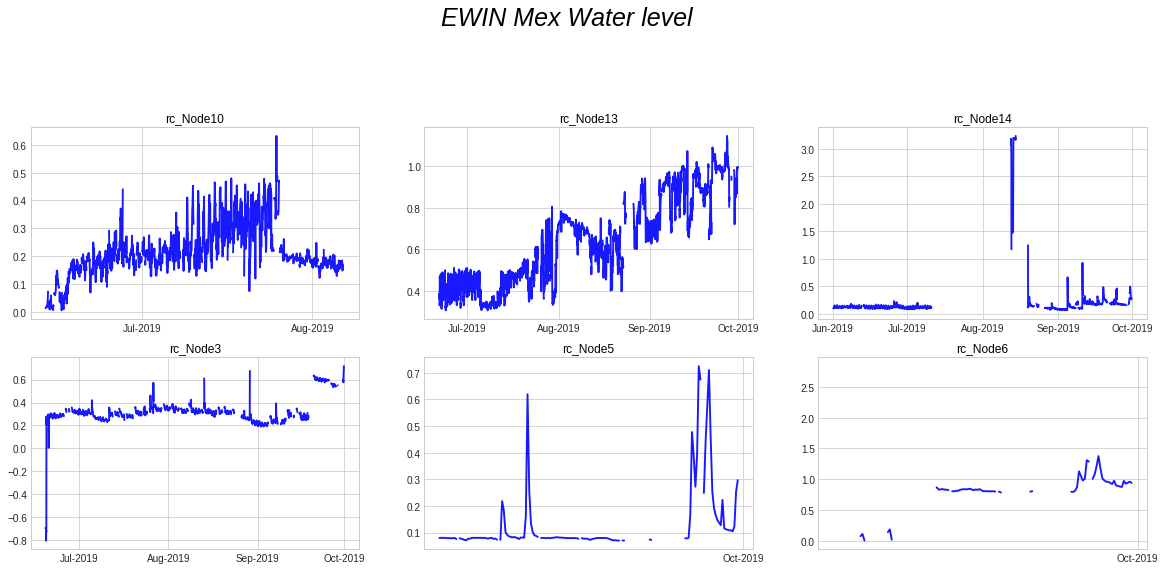

In [0]:
# list files
lvl_file_names = os.listdir(hourly_level)
# Initialize the figure
plt.style.use('seaborn-whitegrid')
# create a color palette
palette = plt.get_cmap('Set3')

fig = plt.figure(figsize=(20, 12))
num = 0
for i in lvl_file_names:
  this_file = os.path.join(hourly_level,i)
  df = pd.read_csv(this_file,infer_datetime_format= True,
                   parse_dates=True,index_col='time_stamp') 
  # sort by datetime
  df = df.sort_values(by=['time_stamp'])
  df = df.resample('h').mean()
  num+=1
  ax = fig.add_subplot(3,3, num)
  ax.plot(df['wl'], marker='', color='blue', linewidth=1.9, alpha=0.9, label=i)
 # Add title
  plt.title(i[:-4], loc='center', fontsize=12, fontweight=0, color="black")
# general title
  plt.suptitle("EWIN Mex Water level ", fontsize=25, fontweight=0,
               color='black', style='italic', y=1.02)

  months = MonthLocator()
  monthsFmt = DateFormatter("%b-%Y")
  ax.xaxis.set_major_locator(months)
  ax.xaxis.set_major_formatter(monthsFmt)

### Atmos data

---



In [0]:
unzip_data_folder = os.path.join(data_source,"unzipped_data")

### Find all Atmos file paths 

In [0]:
# find level files 
all_prcp_files = []
substring = "_10"
for root, subdirs, files in os.walk(unzip_data_folder):
        for filename in files:
            if substring in filename:
                name_path = os.path.join(root,filename)
                all_prcp_files.append(name_path)
                
all_prcp_files

['./ewin_mex/data/unzipped_data/Atmos_aug/Atmos1_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_aug/Atmos2_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_aug/Atmos3_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_aug/Atmos4_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_aug/Atmos5_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_aug/Atmos6_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_aug/Atmos7_aug_10minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_jun/Atmos1_jun_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_jun/Atmos2_jun_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_sep/Atmos1_sep_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_sep/Atmos2_sep_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_sep/Atmos3_sep_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_sep/Atmos4_sep_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_sep/Atmos5_sep_10_minute.txt',
 './ewin_mex/data/unzipped_data/Atmos_sep

###Create a new folder for the processed precip data

In [0]:
# create new folder for the processed precip data
hourly_atmos = os.path.join(data_source,"hourly_atmos")
try:
    os.mkdir(hourly_atmos)
except OSError:
    print ("file exists already %s:" % hourly_atmos)
else:
    print ("Successfully created the directory %s " % hourly_atmos)

In [0]:
for p in all_prcp_files:
  print(p)
  # date parser 
  dparser = lambda x:datetime.strptime(x, "%d/%m/%Y %H:%M")
  # read txt file   
  if 'sep' in p:
    data = pd.read_csv(p,sep='\t',
                parse_dates=['Date'],
                index_col='Date',
                date_parser = dparser,
                error_bad_lines=False,
                encoding='utf-16')
  else:
    data = pd.read_csv(p,sep='\t',
                parse_dates=['Date'],
                index_col='Date',
                date_parser = dparser,
                error_bad_lines=False)  
  # rename variables 
  new_columns = ['air_temp','relative_hum', 'prcp','solar_rad','vapor_press']
  data.columns = new_columns
  # set time_stamp as index
  data.index.names = ['time_stamp']
  # remove the wrong rows
  data.isna().any()
  data.dtypes
  print('missing data per column:\n',data.isnull().sum())
  # find missing data
  missing_data = data[data['air_temp'].isnull()]
  # quick plot 
  data['prcp'].plot()

  set1_noPrcp = data.drop('prcp',1).resample('h').mean()
  set2_Prcp = data.prcp.resample('h').sum(min_count=1)
  # to hourly 
  atmos_hourly = pd.concat([set1_noPrcp, set2_Prcp], axis=1)
  # new file name
  atmos_stations = ['Atmos'+str(i) for i in range(1,9)]
  for s in atmos_stations:
    if s in p:
      fname = s
  # define path 
  new_name_path = os.path.join(hourly_atmos,f'{fname}.csv')
  # if the file exists append, if not create new
  if os.path.isfile(new_name_path):
    atmos_hourly.to_csv(new_name_path,mode='a', header=False)
  else:
    atmos_hourly.to_csv(os.path.join(hourly_atmos,f'{fname}.csv'))



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


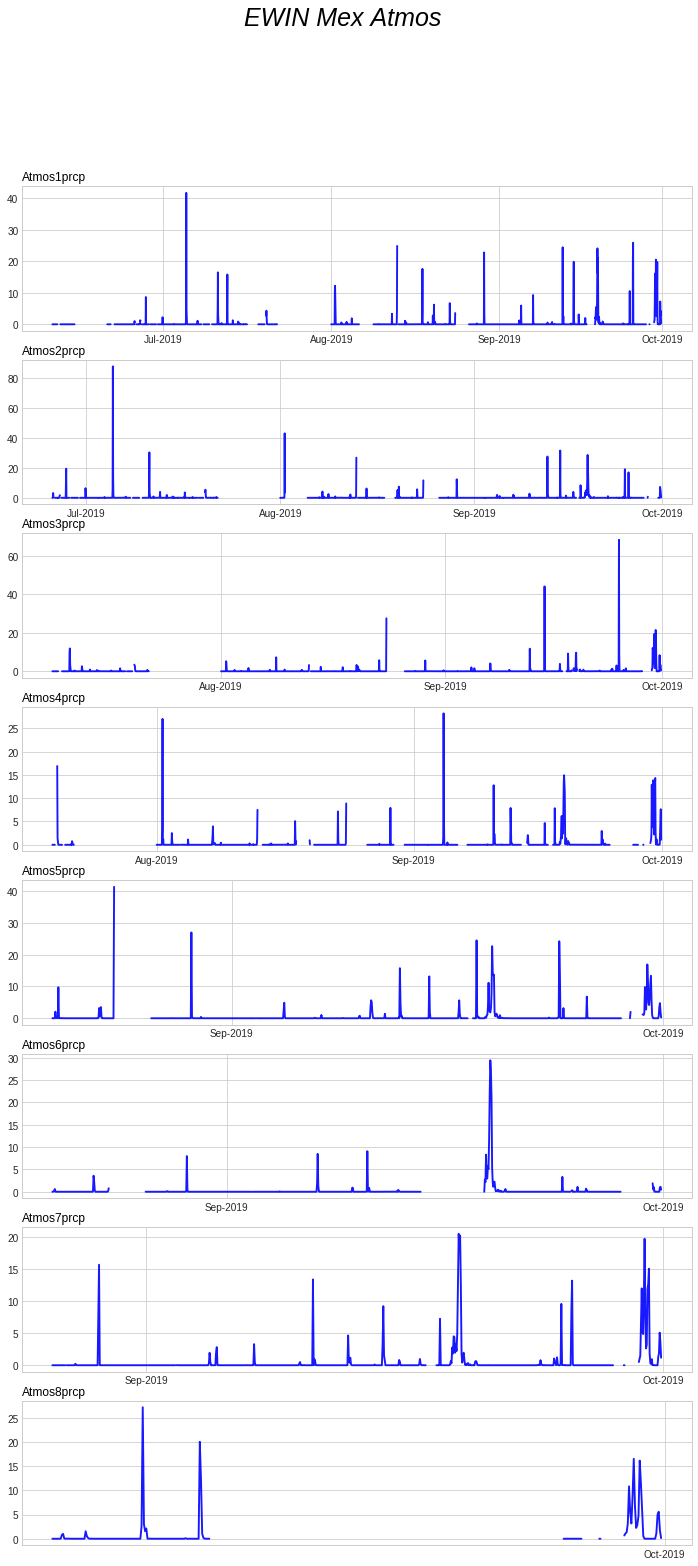

In [0]:
# list files
prcp_file_names = os.listdir(hourly_atmos)
# Initialize the figure
plt.style.use('seaborn-whitegrid')
# variable to plot across stations
var = "prcp"
# fugure config 
fig = plt.figure(figsize=(12, 25))
num = 0
for i in prcp_file_names:
  this_file = os.path.join(hourly_atmos,i)
  df = pd.read_csv(this_file,infer_datetime_format= True,
                   parse_dates=True,index_col='time_stamp') 
  # sort by datetime
  df = df.sort_values(by=['time_stamp'])
  df = df.resample('h').mean()
  num+=1
  ax = fig.add_subplot(8,1, num)
  ax.plot(df[var], marker='', color='blue', linewidth=1.9, alpha=0.9, label=i)
 # Add title
  plt.title(i[:-4]+var, loc='left', fontsize=12, fontweight=0, color="black")
# general title
  plt.suptitle("EWIN Mex Atmos ", fontsize=25,color='black', style='italic')

  months = MonthLocator()
  monthsFmt = DateFormatter("%b-%Y")
  ax.xaxis.set_major_locator(months)
  ax.xaxis.set_major_formatter(monthsFmt)